In [27]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm, trange
from itertools import product
import scipy as sp
import math
from numpy import linalg as la

(1280, 960)


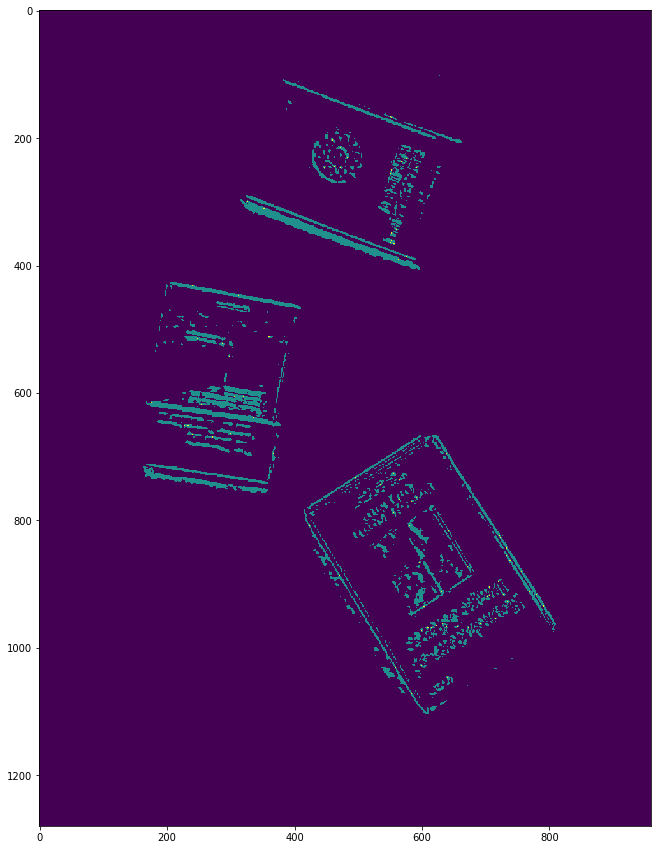

In [88]:
img = cv.imread("C:/Users/nimac/MyProjects/vision/HW/HW2/Q1-09-edge.jpg")
grad = cv.imread("C:/Users/nimac/MyProjects/vision/HW/HW2/Q1-08-grad-dir.jpg")
grad = np.maximum(grad[:, :, 0], grad[:, :, 1], grad[:, :, 2])
img = np.uint32(img)
img_r = img[:,:, 0]
img_g = img[:,:, 1]
img_b = img[:,:, 2]
img = np.maximum(img_r, img_g, img_b)
img_bin = img > 30
row, col = img.shape
print(img.shape)
plt.figure(figsize=(15,15))
plt.imshow(grad)
plt.show()

In [89]:
print(len(np.argwhere(img_bin==True)))
def distance(x, y):
    return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
def draw_rect(x1, x2, x3, x4, img):
    x = [x1, x2, x3, x4, x1]
    for i in range(4):
        minx = min(x[i][0], x[i+1][0])
        maxx = max(x[i][0], x[i+1][0])
        miny = min(x[i][1], x[i+1][1])
        maxy = max(x[i][1], x[i+1][1])
        v = x[i+1] - x[i]
        v = (v[0]/la.norm(v), v[1]/la.norm(v))
        d = distance(x[i+1], x[i])
        for dis in range(int(d)):
            img[x[i][0] + int(v[0]*dis), x[i][1] + int(v[1]*dis)] = 255
        
    return img


def is_rect(x1, x2, x3, x4):
    THRESH = 2
    x = [x1, x2, x3, x4]
    dis = []
    for i in range(3):
        dis.append((distance(x[0], x[1+i]), 1+i))
    dis = sorted(dis, key=lambda x: x[0], reverse=True)
    ind = [x[1] for x in dis]
    if abs(distance(x[0], x[ind[0]]) - distance(x[ind[1]], x[ind[2]])) < THRESH and  abs(distance(x[0],
        x[ind[1]]) - distance(x[ind[0]], x[ind[2]])) < THRESH:
            return True
    return False

def is_edge(a, b):
    minx = min(a[0], b[0])
    maxx = max(a[0], b[0])
    miny = min(a[1], b[1])
    maxy = max(a[1], b[1])
    count = 0
    THRESH = 20
    v = b - a
    v = (v[0]/la.norm(v), v[1]/la.norm(v))
    d = distance(a, b)
    for i in range(int(d)):
        if(img_bin[a[0] + int(v[0]*i)][a[1] + int(v[1]*i)]):
            count = count + 1
            
    if(count > THRESH):
        return True
    return False
    

44477


In [106]:
hough = np.zeros(img.shape)
edge_points = np.argwhere(img > 100)
h_ans = dict()
grad_sin = np.sin(grad)
grad_cos = np.cos(grad)
for i in trange(8):
    for (x,y) in edge_points:
        x1 = int(grad_cos[x,y] * 10*i)
        y1 = int(grad_sin[x,y] * 10*i)
        if(x + x1 < row and x + x1 > 0 and y + y1 < col and y + y1 > 0):
            hough[x + x1,y + y1] = hough[x + x1,y + y1] + 1
        if(x - x1 < row and x - x1 > 0 and y - y1 < col and y - y1 > 0):
            hough[x - x1,y - y1] = hough[x - x1,y - y1] + 1

0
[]


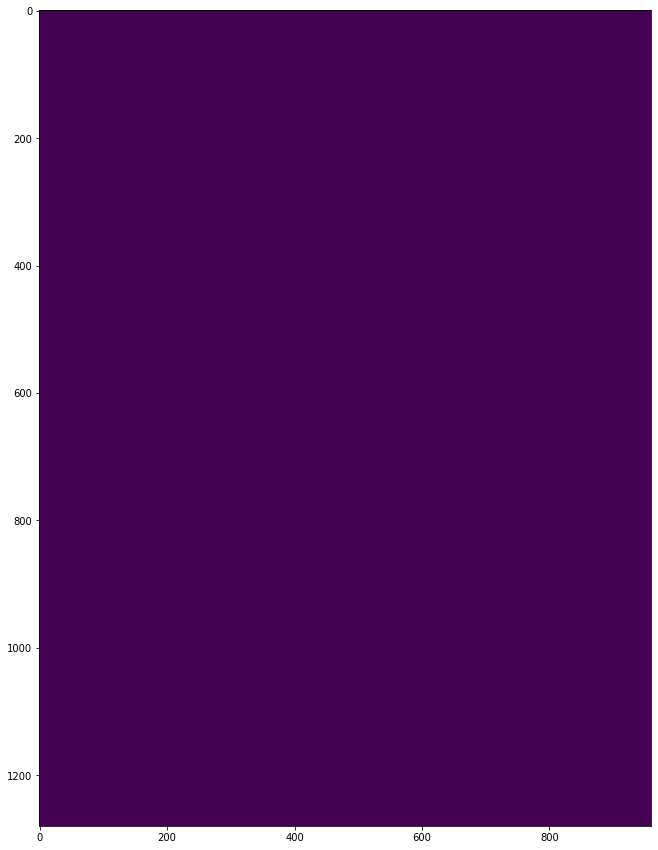

In [107]:
plt.figure(figsize=(15,15))
h = hough.copy()
THRESH = 20
h[h < THRESH]=0
print(len(np.argwhere(h>=THRESH)))
points = np.argwhere(h>=THRESH)
print(points)
h[h >= THRESH]=1
old_points = []
for i in range(len(points)):
    if(i == 0):
        old_points.append(points[0])
    else:
        lpoint = old_points[len(old_points) - 1]
        if(distance(points[i], lpoint) > 30):
            h = draw_rect(points[i], (points[i]+lpoint)//2, lpoint, (points[i]+lpoint)//2, h)
            old_points.append(points[i])
plt.imshow(h)


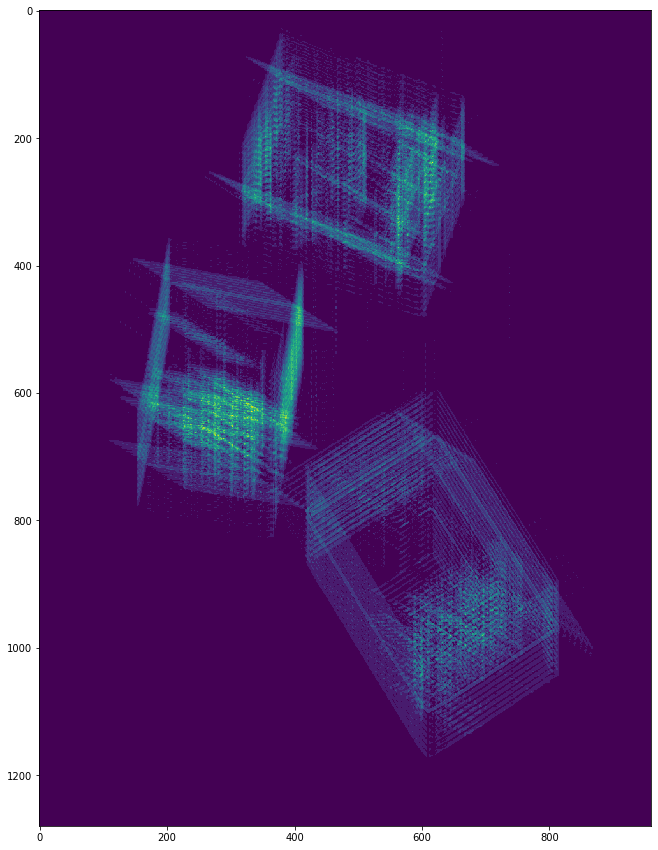

In [108]:
plt.figure(figsize=(15,15))
h = hough.copy()
# h[h>=1] = 1
h[h<1] = 0
plt.imshow(h)

در این تمرین سعی شد تا با استفاده از روش هاف و استفاده از زاویه گرادیان خطوط که در مثال قبل بافته شده بود، مستطیل های شکل را بدست آوریم ولی خروجی کیفیت کافی را نداشت